# WK7 Data Visualization <hr style="border:2.5px solid #126782"></hr>

Name: **Aleja A. Villegas**<br>
Course: **CPE2A**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"..\raw\chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4854 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [3]:
df = df.drop(df.columns[[10,11,12]],axis=1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


# N Chips Manufactured

In [4]:
df_w = df.copy()

In [5]:
chip_count = df_w['Vendor'].value_counts()
chip_count

Vendor
AMD       1662
Intel     1392
NVIDIA    1201
ATI        535
Other       64
Name: count, dtype: int64

In [6]:
type(chip_count)

pandas.core.series.Series

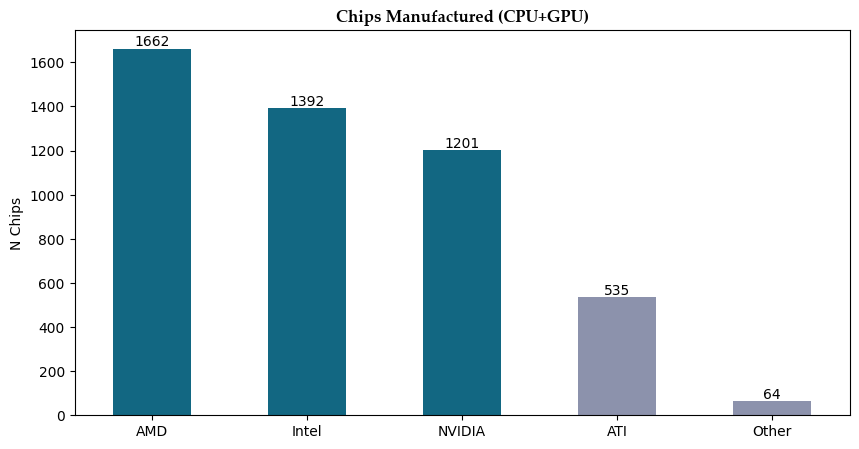

In [7]:
chart = chip_count.plot(kind='bar',
                        color = ['#126782','#126782','#126782','#8C92AC','#8C92AC'],
                        figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Chips Manufactured (CPU+GPU)',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(chip_count.index, rotation=0)
plt.ylabel('N Chips')
plt.show()

# N CPU Manufactured

In [8]:
df_cpu = df_w[df_w['Type']=='CPU']
df_cpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,4/6/2021,10.0,185.0,188.440445,1929.922279,2400,Intel,Intel
2188,AMD Ryzen 9 4900H,CPU,3/16/2020,7.0,54.0,156.000000,9800.000000,3300,TSMC,AMD
2189,Intel Core 2 Duo E6550,CPU,7/1/2007,65.0,65.0,143.000000,291.000000,2333,Intel,Intel
2190,AMD Opteron 246,CPU,12/1/2004,90.0,85.0,188.440445,106.000000,2000,Unknown,AMD


In [9]:
cpu_count = df_cpu['Vendor'].value_counts()
cpu_count

Vendor
Intel    1242
AMD       950
Name: count, dtype: int64

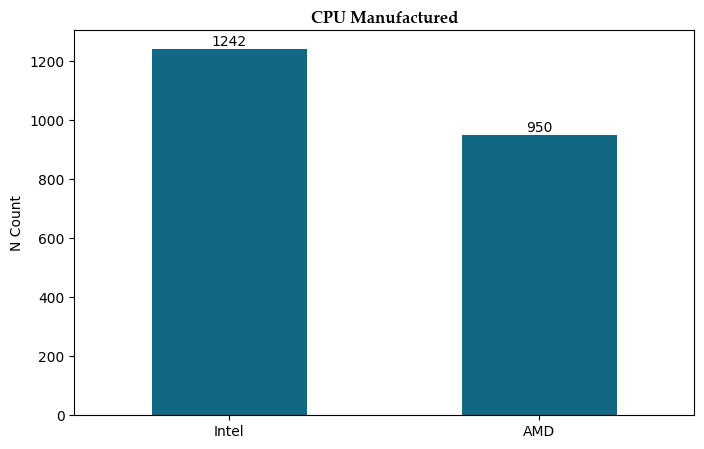

In [10]:
chart = cpu_count.plot(kind='bar',
                        color = ['#126782','#126782','#126782','#8C92AC','#8C92AC'],
                        figsize=(8,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('CPU Manufactured',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('N Count')
plt.xlabel('')
chart.set_xticklabels(cpu_count.index, rotation=0)
plt.show()

# N GPU Manufactured

In [11]:
df_gpu = df_w[df_w['Type']=='GPU']
df_gpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
2192,Intel Xeon E3-1275,GPU,4/3/2011,32.0,95.000000,216.000000,1160.000000,100,Intel,Intel
2193,Matrox Parhelia 128 MB,GPU,6/25/2002,150.0,81.359981,174.000000,80.000000,200,UMC,Other
2194,NVIDIA GeForce MX150 GP107,GPU,2/23/2019,14.0,25.000000,132.000000,3300.000000,1469,Samsung,NVIDIA
2195,Intel GMA 500,GPU,3/2/2008,130.0,81.359981,188.440445,1929.922279,200,Intel,Intel
2196,ATI Radeon HD 4350 AGP,GPU,9/30/2008,55.0,20.000000,73.000000,242.000000,600,TSMC,ATI
...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2/22/2011,40.0,75.000000,332.000000,1950.000000,450,TSMC,NVIDIA
4850,Intel GMA 950,GPU,6/1/2005,90.0,7.000000,188.440445,1929.922279,250,Intel,Intel
4851,NVIDIA GeForce GT 320M,GPU,3/3/2010,40.0,23.000000,100.000000,486.000000,500,TSMC,NVIDIA
4852,NVIDIA GeForce FX 5200,GPU,3/6/2003,150.0,81.359981,65.000000,29.000000,250,TSMC,NVIDIA


In [12]:
gpu_count = df_gpu['Vendor'].value_counts()
gpu_count

Vendor
NVIDIA    1201
AMD        712
ATI        535
Intel      150
Other       64
Name: count, dtype: int64

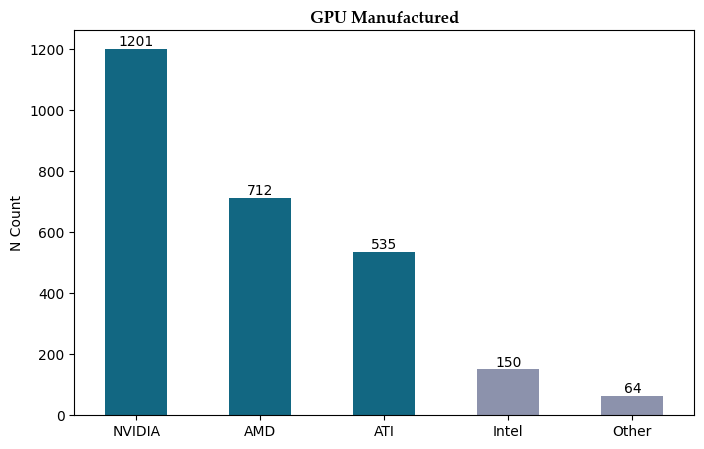

In [13]:
chart = gpu_count.plot(kind='bar',
                        color = ['#126782','#126782','#126782','#8C92AC','#8C92AC'],
                        figsize=(8,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('GPU Manufactured',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('N Count')
plt.xlabel('')
chart.set_xticklabels(gpu_count.index, rotation=0)
plt.show()

# Lowest TDP (Thermal Design Power)

In [14]:
df_tdp = df_w[['Product','TDP']]
df_tdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [15]:
type(df_tdp)

pandas.core.frame.DataFrame

In [16]:
df_tdp = df_tdp.sort_values(by='TDP')
df_tdp

,Product,TDP
60,Intel Atom Z515,1.0
1964,Intel Atom Z600,1.0
1550,Intel Atom Z500,1.0
469,Intel Atom Z620,1.0
2175,Intel Atom Z612,1.0
...,...,...
4735,NVIDIA Quadro Plex 2200 D2,640.0
2908,NVIDIA Tesla S1075,800.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0


In [17]:
df_tdp = df_tdp.head(7)
df_tdp

,Product,TDP
60,Intel Atom Z515,1.0
1964,Intel Atom Z600,1.0
1550,Intel Atom Z500,1.0
469,Intel Atom Z620,1.0
2175,Intel Atom Z612,1.0
1761,Intel Atom Z610,1.0
3101,NVIDIA GeForce2 Go,2.0


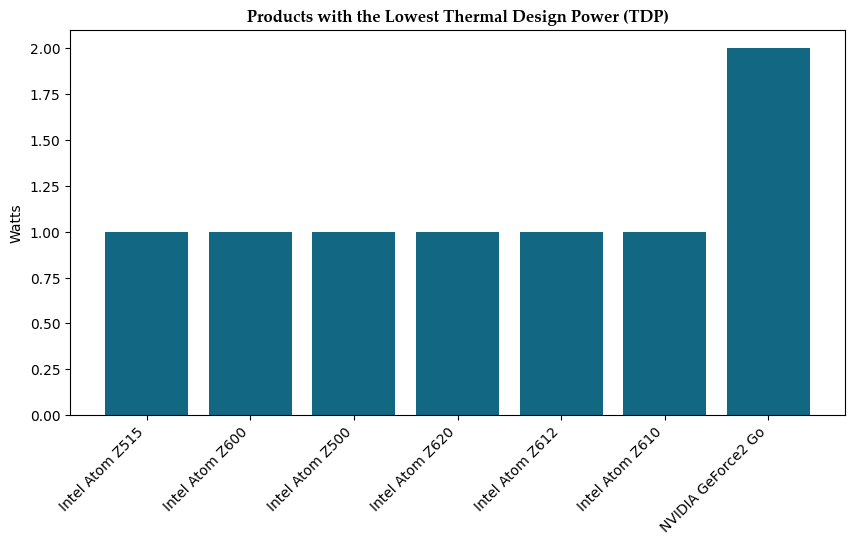

In [18]:
plt.figure(figsize=(10,5))
plt.bar(df_tdp['Product'],df_tdp['TDP'],color='#126782')
plt.title('Products with the Lowest Thermal Design Power (TDP)',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

# Highest TDP (Thermal Design Power)

In [19]:
df_hitdp = df_w[['Product','TDP']]
df_hitdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [20]:
type(df_hitdp)

pandas.core.frame.DataFrame

In [21]:
df_hitdp = df_hitdp.sort_values(by='TDP',ascending=False)
df_hitdp

,Product,TDP
4821,NVIDIA Tesla S2050,900.0
3603,NVIDIA Tesla S1070,800.0
2908,NVIDIA Tesla S1075,800.0
4064,NVIDIA Tesla S870,800.0
2522,NVIDIA Quadro Plex 2100 D4,640.0
...,...,...
1964,Intel Atom Z600,1.0
1550,Intel Atom Z500,1.0
469,Intel Atom Z620,1.0
60,Intel Atom Z515,1.0


In [22]:
df_hitdp = df_hitdp.head(7)
df_hitdp

,Product,TDP
4821,NVIDIA Tesla S2050,900.0
3603,NVIDIA Tesla S1070,800.0
2908,NVIDIA Tesla S1075,800.0
4064,NVIDIA Tesla S870,800.0
2522,NVIDIA Quadro Plex 2100 D4,640.0
4420,NVIDIA Quadro Plex 1000 Model II,640.0
4735,NVIDIA Quadro Plex 2200 D2,640.0


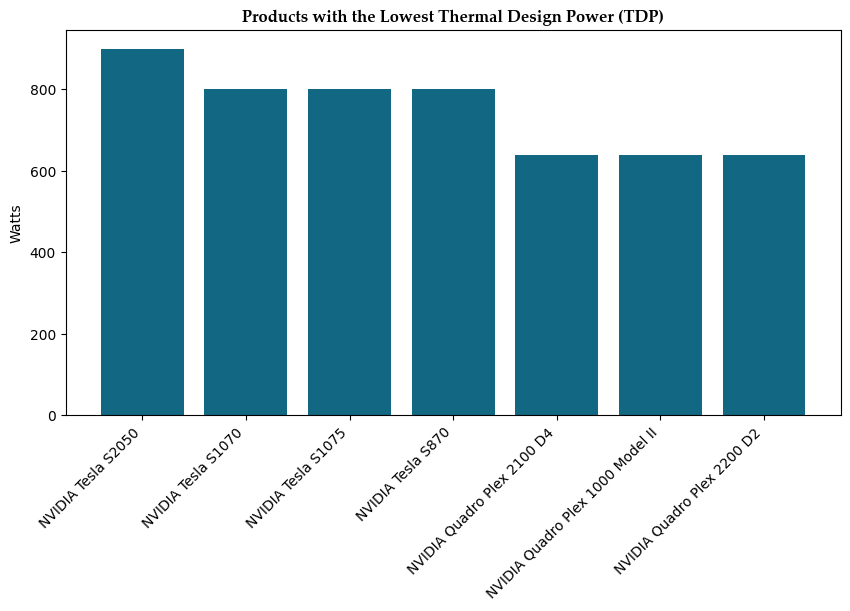

In [23]:
plt.figure(figsize=(10,5))
plt.bar(df_hitdp['Product'],df_hitdp['TDP'],color='#126782')
plt.title('Products with the Lowest Thermal Design Power (TDP)',
          fontfamily = 'Palatino Linotype',
          fontsize=12,
          fontweight='bold')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

# CPU and GPU Process Size Trend

In [24]:
df_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Process_Size
2192,GPU,4/3/2011,32.0
2193,GPU,6/25/2002,150.0
2194,GPU,2/23/2019,14.0
2195,GPU,3/2/2008,130.0
2196,GPU,9/30/2008,55.0
...,...,...,...
4849,GPU,2/22/2011,40.0
4850,GPU,6/1/2005,90.0
4851,GPU,3/3/2010,40.0
4852,GPU,3/6/2003,150.0


In [25]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps

,Type,Date,Process_Size,Year
2192,GPU,2011-04-03,32.0,2011.0
2193,GPU,2002-06-25,150.0,2002.0
2194,GPU,2019-02-23,14.0,2019.0
2195,GPU,2008-03-02,130.0,2008.0
2196,GPU,2008-09-30,55.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,40.0,2011.0
4850,GPU,2005-06-01,90.0,2005.0
4851,GPU,2010-03-03,40.0,2010.0
4852,GPU,2003-03-06,150.0,2003.0


In [26]:
df_ps = df_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_ps

,Year,Process_Size
0,2000.0,180.673973
1,2001.0,162.757339
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.785087


In [27]:
df_gpu_ps = df_w[['Type', 'Date', 'Process_Size']].where(df_w['Type']=='CPU').dropna()
df_gpu_ps

,Type,Date,Process_Size
0,CPU,2/20/2007,65.0
1,CPU,9/6/2018,14.0
2,CPU,9/2/2020,10.0
3,CPU,9/1/2013,22.0
4,CPU,5/3/2011,45.0
...,...,...,...
2187,CPU,4/6/2021,10.0
2188,CPU,3/16/2020,7.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,90.0


In [28]:
df_gpu_ps['Date'] = pd.to_datetime(df_gpu_ps['Date'])
df_gpu_ps['Year'] = df_gpu_ps['Date'].dt.year
df_gpu_ps

,Type,Date,Process_Size,Year
0,CPU,2007-02-20,65.0,2007.0
1,CPU,2018-09-06,14.0,2018.0
2,CPU,2020-09-02,10.0,2020.0
3,CPU,2013-09-01,22.0,2013.0
4,CPU,2011-05-03,45.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,10.0,2021.0
2188,CPU,2020-03-16,7.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,90.0,2004.0


In [29]:
df_gpu_ps = df_gpu_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_gpu_ps

,Year,Process_Size
0,2000.0,180.000000
1,2001.0,137.790698
2,2002.0,132.564103
3,2003.0,130.000000
4,2004.0,109.705882
5,2005.0,92.954545
6,2006.0,75.925926
7,2007.0,70.869565
8,2008.0,58.571429
9,2009.0,45.913043


Text(0, 0.5, 'nm')

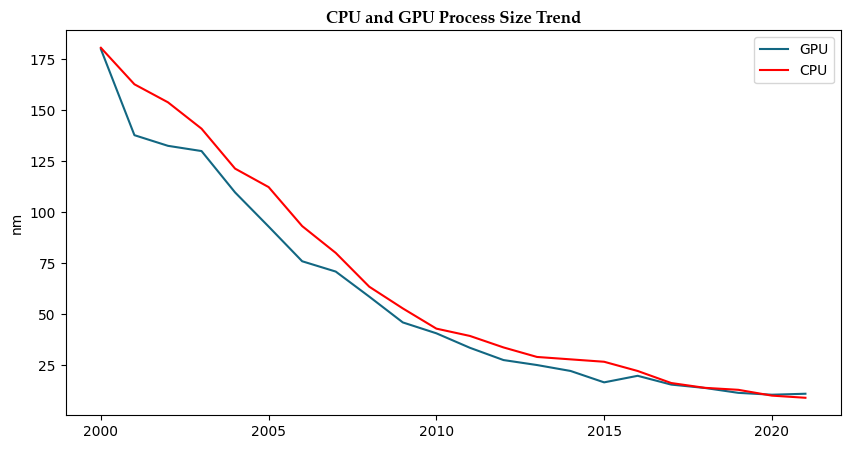

In [30]:
plt.figure(figsize=(10,5))
plt.plot(df_gpu_ps['Year'],df_gpu_ps['Process_Size'], color = '#126782', label ='GPU')
plt.plot(df_ps['Year'],df_ps['Process_Size'], color = 'red', label = 'CPU')
plt.legend()
plt.title('CPU and GPU Process Size Trend',
          fontfamily = 'Palatino Linotype',
          fontsize = 12,
          fontweight= 'bold')
plt.ylabel('nm')

# Frequency Trend Over Time

In [31]:
df_f = df_w[['Type', 'Date', 'Frequency']].where(df_w['Type']=='GPU').dropna()
df_f['Date'] = pd.to_datetime(df_f['Date'])
df_f['Year'] = df_f['Date'].dt.year
df_f = df_f.groupby('Year')['Frequency'].mean().reset_index()
df_f

,Year,Frequency
0,2000.0,165.800000
1,2001.0,196.061224
2,2002.0,244.289855
3,2003.0,304.803571
4,2004.0,367.376923
5,2005.0,405.273684
6,2006.0,460.472868
7,2007.0,524.360759
8,2008.0,564.190751
9,2009.0,584.584906


In [32]:
df_f_cpu = df_w[['Type', 'Date', 'Frequency']].where(df_w['Type']=='CPU').dropna()
df_f_cpu['Date'] = pd.to_datetime(df_f_cpu['Date'])
df_f_cpu['Year'] = df_f_cpu['Date'].dt.year
df_f_cpu = df_f_cpu.groupby('Year')['Frequency'].mean().reset_index()
df_f_cpu

,Year,Frequency
0,2000.0,992.117647
1,2001.0,1801.662791
2,2002.0,2050.897436
3,2003.0,2155.369863
4,2004.0,2267.705882
5,2005.0,2409.831169
6,2006.0,2370.696296
7,2007.0,2180.652174
8,2008.0,2287.241071
9,2009.0,2519.904348


Text(0, 0.5, 'Frequency')

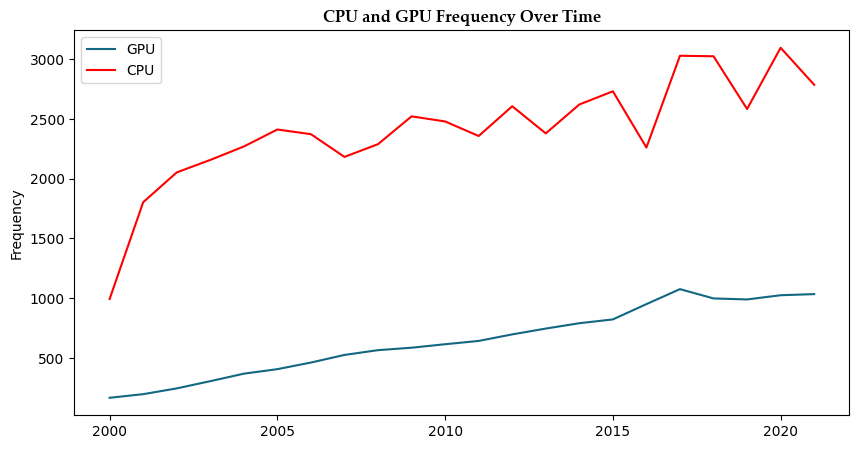

In [33]:
plt.figure(figsize = (10, 5))
plt.plot(df_f['Year'], df_f['Frequency'], color = '#126782', label = 'GPU')
plt.plot(df_f_cpu['Year'], df_f_cpu['Frequency'], color = 'red', label = 'CPU')
plt.legend()
plt.title('CPU and GPU Frequency Over Time',
          fontfamily = 'Palatino Linotype',
          fontsize = 12,
          fontweight = 'bold')
plt.ylabel('Frequency')

# Process Size Vs. Transistor Count

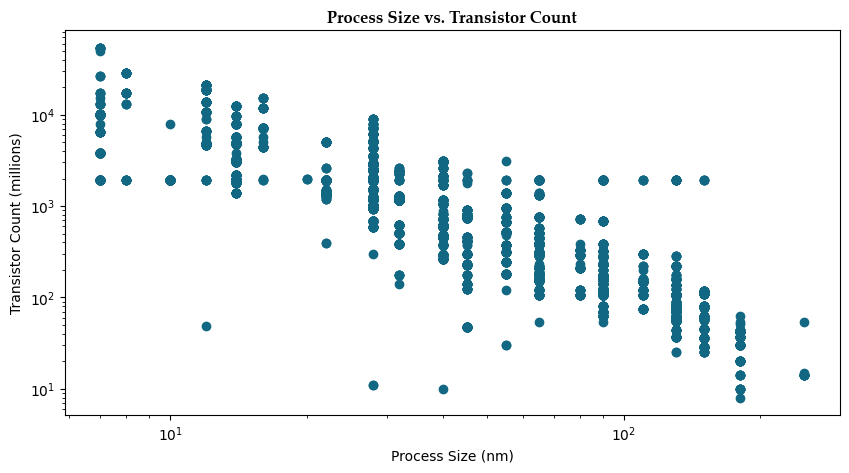

In [34]:
plt.figure(figsize = (10, 5))
plt.scatter(df_w['Process_Size'], df_w['Transistors'], color = '#126782')
plt.xlabel("Process Size (nm)")
plt.ylabel("Transistor Count (millions)")
plt.title("Process Size vs. Transistor Count",
          fontfamily = 'Palatino Linotype',
          fontsize = 12,
          fontweight = 'bold')
plt.xscale('log')
plt.yscale('log')
plt.show()


# Number of Transistors, Frequency, and TDP Over Time<br>Scatterplot

In [35]:
df_w['Date'] = pd.to_datetime(df_w['Date'])
df_w = df_w.sort_values(by='Date')


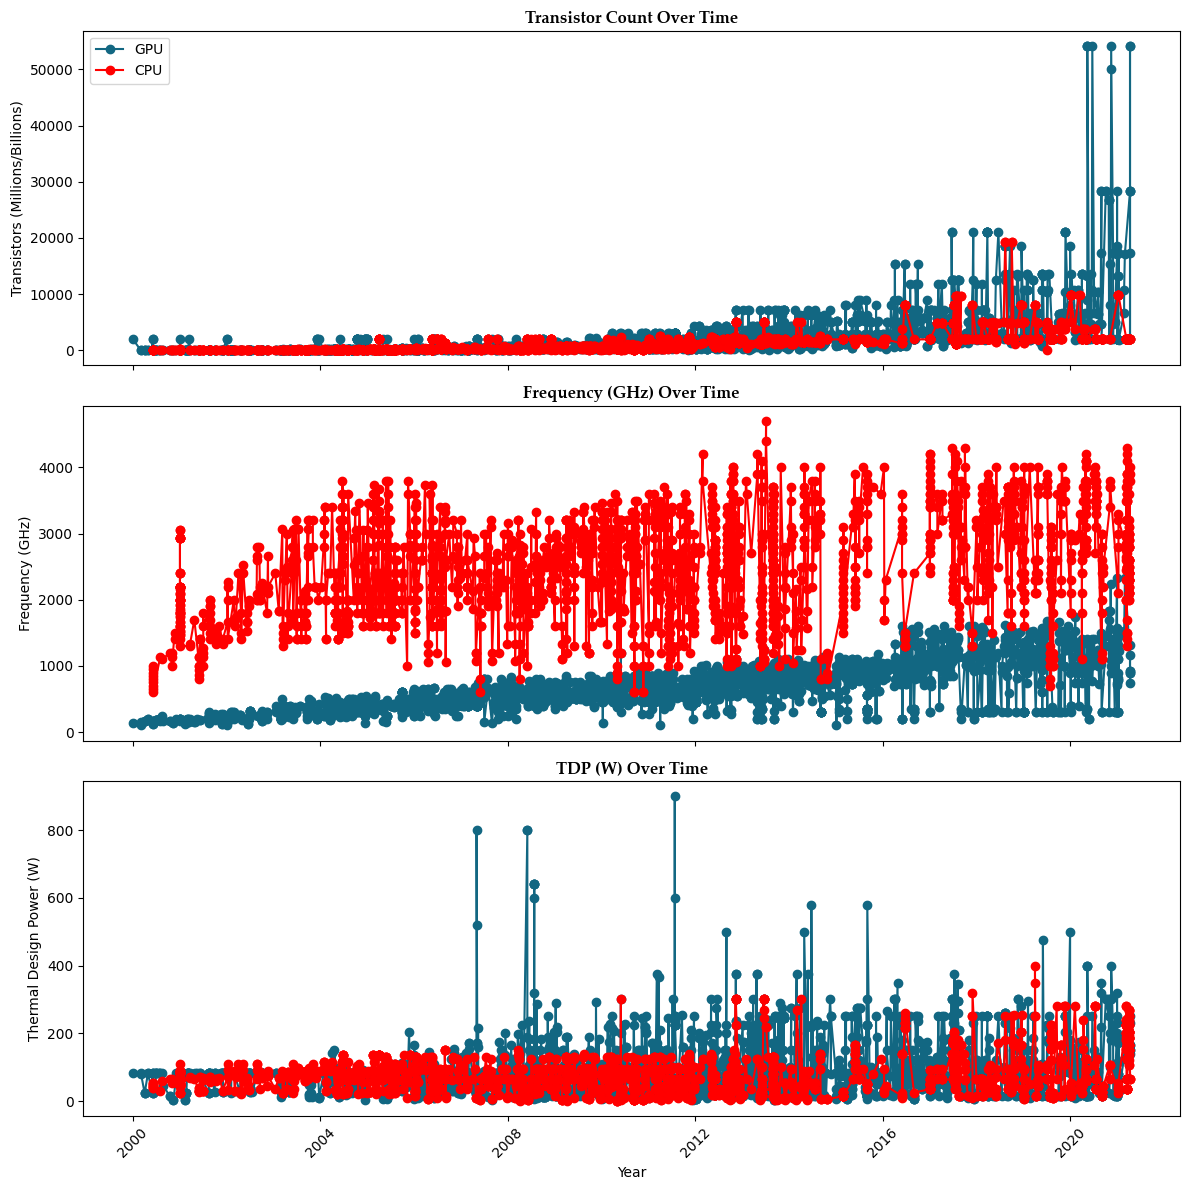

In [36]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

colors = {'CPU': 'red', 'GPU': '#126782'}

for chip_type in df_w['Type'].unique():
    subset = df_w[df_w['Type'] == chip_type]
    ax[0].plot(subset['Date'], subset['Transistors'], 'o-', label=chip_type, color=colors[chip_type])

ax[0].set_title("Transistor Count Over Time",
                fontfamily = 'Palatino Linotype',
                fontsize = 12,
                fontweight = 'bold')
ax[0].set_ylabel("Transistors (Millions/Billions)")
ax[0].legend()

for chip_type in df_w['Type'].unique():
    subset = df_w[df_w['Type'] == chip_type]
    ax[1].plot(subset['Date'], subset['Frequency'], 'o-', label=chip_type, color=colors[chip_type])

ax[1].set_title("Frequency (GHz) Over Time",
                fontfamily = 'Palatino Linotype',
                fontsize = 12,
                fontweight = 'bold')
ax[1].set_ylabel("Frequency (GHz)")

for chip_type in df_w['Type'].unique():
    subset = df_w[df_w['Type'] == chip_type]
    ax[2].plot(subset['Date'], subset['TDP'], 'o-', label=chip_type, color=colors[chip_type])

ax[2].set_title("TDP (W) Over Time",
                fontfamily = 'Palatino Linotype',
                fontsize = 12,
                fontweight = 'bold')
ax[2].set_ylabel("Thermal Design Power (W)")

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Die Sizes Over Time

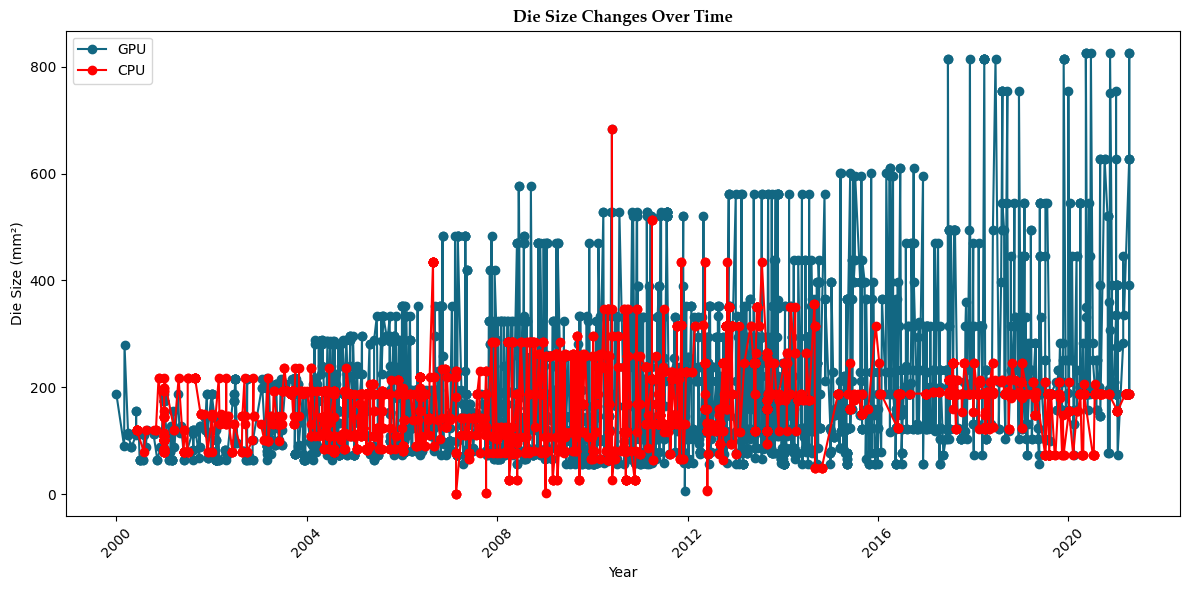

In [37]:
plt.figure(figsize=(12, 6))

colors = {'CPU': 'red', 'GPU': '#126782'}

for chip_type in df_w['Type'].unique():
    subset = df_w[df_w['Type'] == chip_type]
    plt.plot(subset['Date'], subset['Die_Size'], 'o-', label=chip_type, color=colors[chip_type])

plt.title("Die Size Changes Over Time",
          fontfamily = 'Palatino Linotype',
          fontsize = 12,
          fontweight = 'bold')
plt.xlabel("Year")
plt.ylabel("Die Size (mm²)")

plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
